# Project 2 Linear Regression

In [ ]:
Fields in the data:
    - instant: record index
    - dteday: date
    - season: season (1:spring, 2:summer, 3:fall, 4:winter)
    - yr: year (0: 2011, 1: 2012)
    - mnth: month (1 to 12)
    - hr: hour (0 to 23)
    - holiday : whether the day is a holiday or not
    - weekday : day of the week
    - workingday : if the day is neither weekend nor a holiday is 1, otherwise is 0
    - weathersit : 
        - 1: Clear, Few clouds, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds
        - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
    - temp : normalized temperature in Celsius; the values are divided to 41 (max)
    - atemp: normalized temperature felt in Celsius; the values are divided to 50 (max)
    - hum: normalized humidity; the values are divided to 100 (max)
    - windspeed: normalized wind speed; the values are divided to 67 (max)
    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Machine Learning Pipeline
# Extracting the data
# EDA
# Data Cleaning          null, nan, outliers
# Data Preprocessing
# Input and Output Features
# Train Test Split
# Apply Linear Regression Algorithm
# Predict Outcomes

In [9]:
df = pd.read_csv("G:/Machine Learning/hour.csv")

In [10]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31/12/12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31/12/12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31/12/12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31/12/12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [13]:
# Identify the shape of the dataset
df.shape

(17379, 17)

In [14]:
# 1. Check Data.
# 2. Check Columns
# 3. Identify Categorical features
# 4. Identify Numerical Feature
# 5. Identify Null Values
# 6. Determine Input and Output features
# 7. Data Pre-processing

In [15]:
# 2. Check Columns

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [24]:
# 3. Identify Categorical features

l1 = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']



In [31]:
list = []
categorical = []
continious = []
for i in l1:
    list =  df[i].unique().tolist()
    if len(list) < 25:
        categorical += i
    else:
        continious += i

In [28]:
print(categorical)
print(continious)

['s', 'e', 'a', 's', 'o', 'n', 'y', 'r', 'm', 'n', 't', 'h', 'h', 'r', 'h', 'o', 'l', 'i', 'd', 'a', 'y', 'w', 'e', 'e', 'k', 'd', 'a', 'y', 'w', 'o', 'r', 'k', 'i', 'n', 'g', 'd', 'a', 'y', 'w', 'e', 'a', 't', 'h', 'e', 'r', 's', 'i', 't']
['t', 'e', 'm', 'p', 'a', 't', 'e', 'm', 'p', 'h', 'u', 'm', 'w', 'i', 'n', 'd', 's', 'p', 'e', 'e', 'd', 'c', 'a', 's', 'u', 'a', 'l', 'r', 'e', 'g', 'i', 's', 't', 'e', 'r', 'e', 'd', 'c', 'n', 't']


In [32]:
# No null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
# Drop instant, dteday, casual, registered

df.drop(['dteday', 'casual', 'registered'],axis= 1, inplace=True)

In [38]:
# 6. Determine Input and Output Features



,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [39]:
X = df.drop('cnt', axis= 1)            # Input feature
Y = df['cnt']                          # Output feature

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Split Dataset in Training and Testing Data.   

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.95, random_state= 1234)

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16510, 12), (869, 12), (16510,), (869,))

In [49]:
# Apply Linear Regression Algorithm.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LR = LinearRegression()

# Train Model

LR.fit(X_train, Y_train)

LinearRegression()

In [52]:
LR.intercept_

-25.78393948704698

In [53]:
LR.coef_

array([ 1.95831909e+01,  8.01656418e+01,  4.99384797e-02,  7.69594699e+00,
       -2.20445445e+01,  1.83489375e+00,  4.03830626e+00, -3.70493000e+00,
        6.52882293e+01,  2.48286012e+02, -1.98025464e+02,  4.23807504e+01])

In [54]:
# Predict Outcomes

LR_pred = LR.predict(X_test)

In [55]:
# Evaluate Model:

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, LR_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, LR_pred))

Mean Absolute Error:  107.65476390977628
Mean Squared Error:  20246.91731553233


In [58]:
# Objective  =>   Minimize Error Values.

In [59]:
# 1. Select I/P features.


<Axes: >

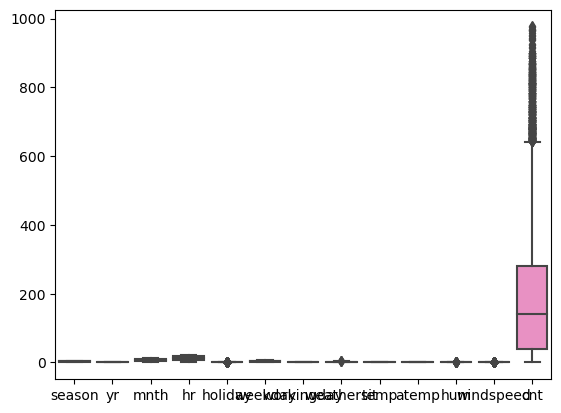

In [60]:
sns.boxplot(data=df)

In [61]:
# 1. Outlier Treatment.
# 2. Select Features.
# 3. Apply Pre-Processing.

In [ ]:
Steps                                    Mean_Absolute_Error                              Mean_Squared_Error

1. Linear Regression                          107.56                                             20246
2. Outlier + LR                               95.91                                             15889.29
3. Feature Selection + LR
4. Pre - Processing + LR

In [63]:
# 1. Outlier Treatment.       


In [84]:
df1 = df.query('cnt < 700')
df1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [85]:
Y_outlier_remove = df1['cnt']

In [86]:
X_outlier_remove = df1.drop('cnt', axis= 1)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_outlier_remove, Y_outlier_remove, train_size = 0.95, random_state= 1234)

In [88]:
LR = LinearRegression()

# Train Model

LR.fit(X_train, Y_train)

LinearRegression()

In [89]:
LR_pred = LR.predict(X_test)

In [90]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, LR_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, LR_pred))

Mean Absolute Error:  95.91915439116417
Mean Squared Error:  15889.298466825257


In [92]:
# 2. Select Features.


In [93]:
df1.corr().round(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.00,-0.02,0.83,-0.01,-0.01,-0.00,0.01,-0.01,0.31,0.32,0.15,-0.15,0.17
yr,-0.02,1.00,-0.02,-0.01,0.01,-0.01,-0.01,-0.01,0.03,0.02,-0.07,-0.01,0.21
mnth,0.83,-0.02,1.00,-0.01,0.02,0.01,-0.00,0.01,0.20,0.21,0.17,-0.14,0.11
hr,-0.01,-0.01,-0.01,1.00,0.00,-0.00,-0.00,-0.02,0.13,0.12,-0.27,0.14,0.41
holiday,-0.01,0.01,0.02,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,-0.02
weekday,-0.00,-0.01,0.01,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03
workingday,0.01,-0.01,-0.00,-0.00,-0.25,0.04,1.00,0.05,0.05,0.05,0.02,-0.01,-0.00
weathersit,-0.01,-0.01,0.01,-0.02,-0.02,0.00,0.05,1.00,-0.10,-0.10,0.42,0.03,-0.14
temp,0.31,0.03,0.20,0.13,-0.03,-0.00,0.05,-0.10,1.00,0.99,-0.06,-0.03,0.40
atemp,0.32,0.02,0.21,0.12,-0.03,-0.01,0.05,-0.10,0.99,1.00,-0.04,-0.07,0.40


In [ ]:
# one hot encoding on 
# season
# yr
# hr